<a href="https://colab.research.google.com/github/Kartik-loop/customers_sales_analysis/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Sales Analysis



In [5]:
# --- Cell 1: Imports & Global Configuration ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Optimization: Set global plotting style
sns.set_theme(style="whitegrid", palette="muted")
# RESIZED: (10, 5) is standard for clear, readable plots on most screens
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 11

print("Environment Setup Complete.")


Environment Setup Complete.


In [2]:
from google.colab import files

uploaded = files.upload()


Saving customer_churn (1).csv to customer_churn (1).csv
Saving sales_data (1) (1).csv to sales_data (1) (1).csv


--- 📊 Starting Comprehensive Sales Analysis: sales_data (1) (1).csv ---


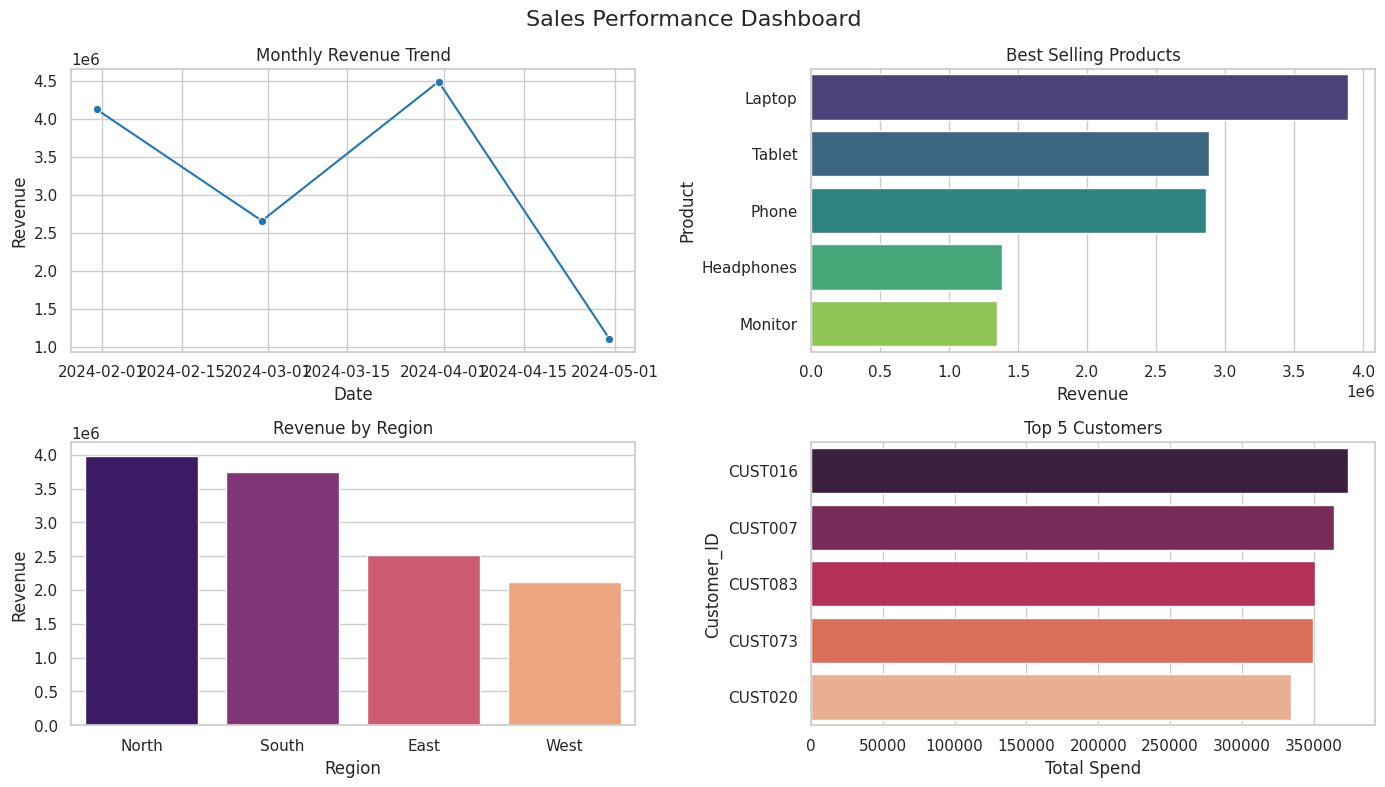

✅ Task 1 Analysis Complete.


In [6]:
# --- Cell 2: Advanced Sales Analysis ---

def analyze_sales_comprehensive(file_path):
    print(f"--- 📊 Starting Comprehensive Sales Analysis: {file_path} ---")

    # 1. Optimized Data Loading
    try:
        df = pd.read_csv(file_path, parse_dates=['Date'])
    except Exception as e:
        print(f"Error loading file: {e}")
        return

    # 2. Data Aggregations
    product_rev = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)
    region_rev = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending=False)
    monthly_sales = df.set_index('Date').resample('ME')['Total_Sales'].sum()

    # 3. Visualizations
    # RESIZED: Changed to (14, 8) for a tighter layout
    fig, axes = plt.subplots(2, 2, figsize=(14, 8))
    fig.suptitle('Sales Performance Dashboard', fontsize=16)

    # Plot A: Monthly Trend
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', ax=axes[0, 0], color='tab:blue')
    axes[0, 0].set_title('Monthly Revenue Trend')
    axes[0, 0].set_ylabel('Revenue')

    # Plot B: Best Selling Products
    sns.barplot(x=product_rev.values, y=product_rev.index, ax=axes[0, 1], palette='viridis', hue=product_rev.index)
    axes[0, 1].set_title('Best Selling Products')
    axes[0, 1].set_xlabel('Revenue')

    # Plot C: Revenue by Region
    sns.barplot(x=region_rev.index, y=region_rev.values, ax=axes[1, 0], palette='magma', hue=region_rev.index)
    axes[1, 0].set_title('Revenue by Region')
    axes[1, 0].set_ylabel('Revenue')

    # Plot D: Top 5 Customers
    top_customers = df.groupby('Customer_ID')['Total_Sales'].sum().nlargest(5)
    sns.barplot(x=top_customers.values, y=top_customers.index, ax=axes[1, 1], palette='rocket', hue=top_customers.index)
    axes[1, 1].set_title('Top 5 Customers')
    axes[1, 1].set_xlabel('Total Spend')

    plt.tight_layout()
    plt.show()

    print("✅ Task 1 Analysis Complete.")

# Execute Task 1
analyze_sales_comprehensive('sales_data (1) (1).csv')

--- 🤖 Starting Churn Prediction & Insights: customer_churn (1).csv ---


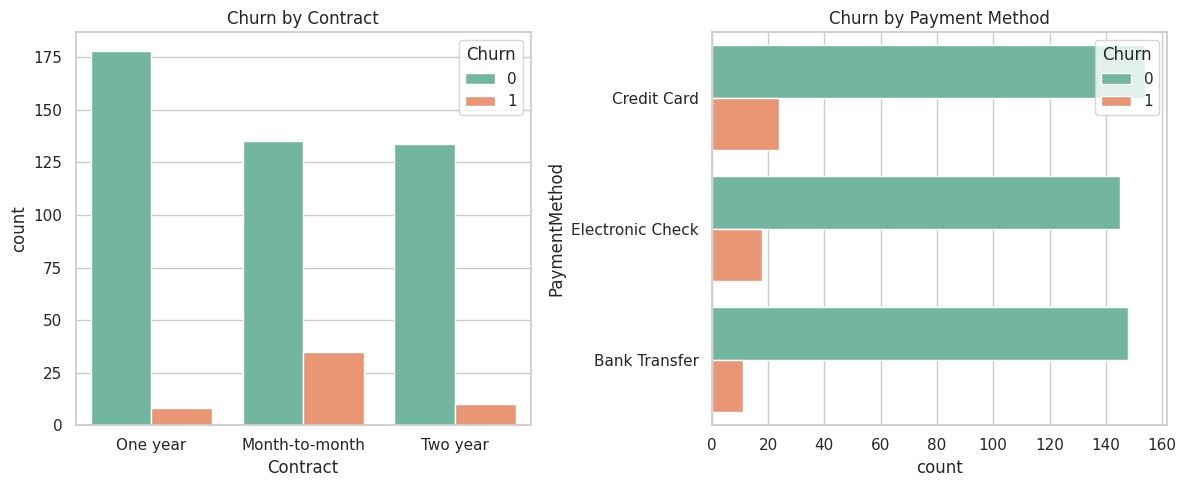


--- Model Performance ---
Accuracy: 94.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97        84
           1       0.92      0.69      0.79        16

    accuracy                           0.94       100
   macro avg       0.93      0.84      0.88       100
weighted avg       0.94      0.94      0.94       100



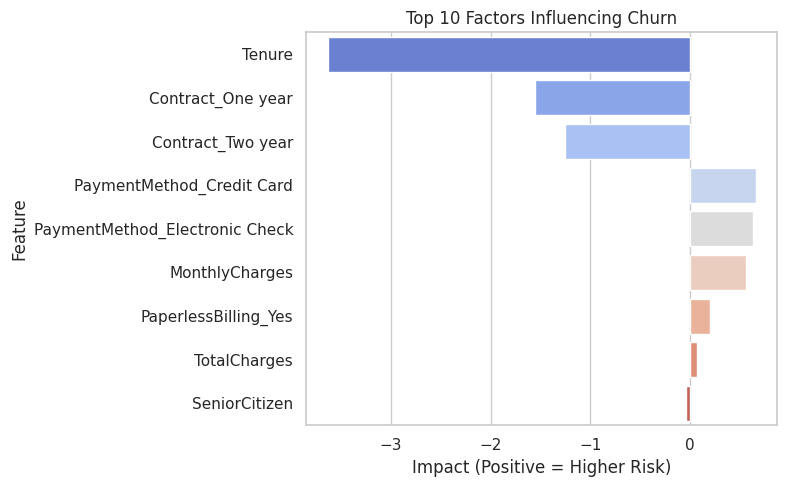

✅ Task 2 Analysis Complete.


In [10]:
# --- Cell 3: Churn Prediction & Insights ---

def analyze_and_predict_churn(file_path):
    print(f"--- 🤖 Starting Churn Prediction & Insights: {file_path} ---")

    # 1. Load & Clean Data
    df = pd.read_csv(file_path)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df = df.dropna()

    # 2. Exploratory Data Analysis (EDA)
    # RESIZED: (12, 5) fits two plots side-by-side without being huge
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # EDA 1: Contract Type
    sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0], palette='Set2')
    axes[0].set_title('Churn by Contract')

    # EDA 2: Payment Method
    sns.countplot(data=df, y='PaymentMethod', hue='Churn', ax=axes[1], palette='Set2')
    axes[1].set_title('Churn by Payment Method')

    plt.tight_layout()
    plt.show()

    # 3. Model Pipeline
    X = df.drop(columns=['Churn', 'CustomerID'])
    y = df['Churn']

    num_cols = X.select_dtypes(include=['number']).columns
    cat_cols = X.select_dtypes(include=['object']).columns

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ])

    # 4. Train & Evaluate
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n--- Model Performance ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # 5. Feature Importance
    if hasattr(model.named_steps['classifier'], 'coef_'):
        cat_names = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols)
        feature_names = np.r_[num_cols, cat_names]

        importance = pd.DataFrame({
            'Feature': feature_names,
            'Coefficient': model.named_steps['classifier'].coef_[0]
        }).sort_values(by='Coefficient', key=abs, ascending=False).head(10)

        # RESIZED: (8, 5) for a single centered plot
        plt.figure(figsize=(8, 5))
        sns.barplot(data=importance, x='Coefficient', y='Feature', hue='Feature', palette='coolwarm')
        plt.title('Top 10 Factors Influencing Churn')
        plt.xlabel('Impact (Positive = Higher Risk)')
        plt.tight_layout()
        plt.show()

    print("✅ Task 2 Analysis Complete.")

# Execute Task 2
analyze_and_predict_churn('customer_churn (1).csv')